In [1]:
# Manipulación de datos
import pandas as pd

df_jugadores = pd.read_csv("jugadores_cebollitas.csv")
X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
componentes = pca.fit_transform(X_scaled)

df_jugadores['PC1'] = componentes[:,0]
df_jugadores['PC2'] = componentes[:,1]

<Axes: xlabel='PC1', ylabel='PC2'>

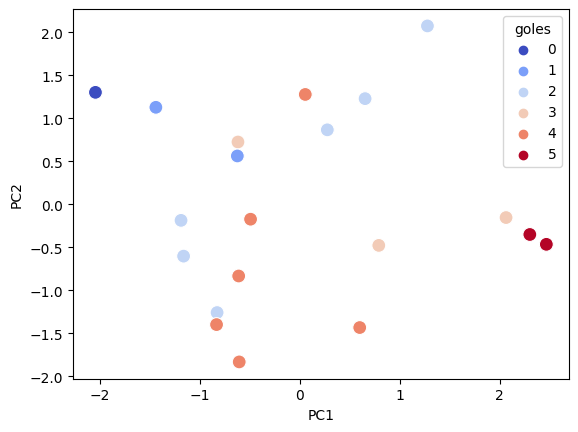

In [4]:
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=df_jugadores, hue='goles', palette='coolwarm', s=100)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X_scaled)

/Users/joacogalt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='PC1', ylabel='PC2'>

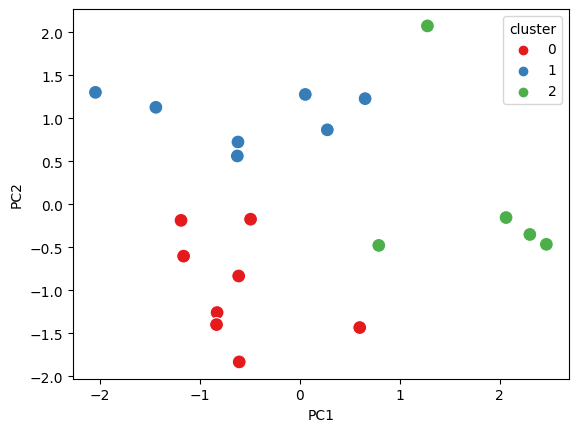

In [6]:

sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set1', data=df_jugadores, s=100)

In [7]:
varianza = pca.explained_variance_ratio_

print(f"Varianza explicada por PC1: {varianza[0]:.2%}")
print(f"Varianza explicada por PC2: {varianza[1]:.2%}")
print(f"Varianza total explicada: {varianza.sum():.2%}")

Varianza explicada por PC1: 38.65%
Varianza explicada por PC2: 28.39%
Varianza total explicada: 67.04%


In [8]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt


def explorar_componentes(eje_x, eje_y):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=eje_x, y=eje_y, hue='cluster', data=df_jugadores, palette='Set2', s=100)
    plt.title(f'Clusters en espacio {eje_x} vs {eje_y}')
    plt.grid(True)
    plt.show()

widgets.interactive(
    explorar_componentes,
    eje_x=['PC1', 'PC2'],
    eje_y=['PC1', 'PC2']
)

interactive(children=(Dropdown(description='eje_x', options=('PC1', 'PC2'), value='PC1'), Dropdown(description…